In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path = '/Users/dangloan/Documents/learning_analytics/project/'

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv(path + '3_data/clothing_review/Womens Clothing E-Commerce Reviews.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns =['Clothing_ID',
 'Age',
 'Title',
 'Review_Text',
 'Rating',
 'Recommended_IND',
 'Positive_Feedback_Count',
 'Division_Name',
 'Department_Name',
 'Class_Name']

int64
object


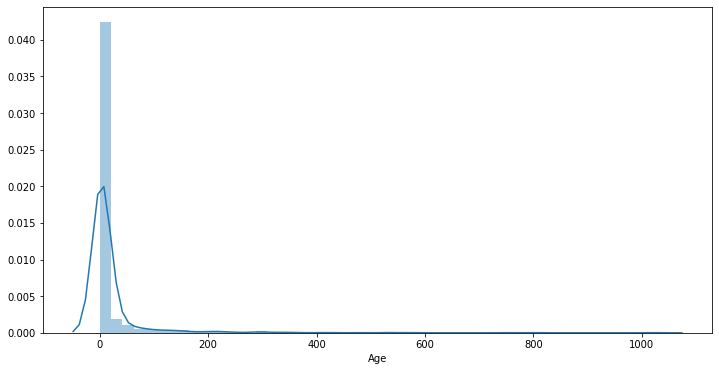

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
a = df.groupby('Clothing_ID')['Age'].count().reset_index()
b= a.sort_values(by='Age',ascending=False)
# b['Age'] = b['Age'].astype(int)
b['Clothing_ID'] = b['Clothing_ID'].astype(str)
print(b['Age'].dtype)
print(b['Clothing_ID'].dtype)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(a['Age'])

##### A product (Clothing_ID) can receive more than one review. So, analysis per product can be an idea.

In [145]:
b.iloc[3]

Clothing_ID    1081
Age            560 
Name: 1055, dtype: object

In [147]:
b[b['Clothing_ID'] == '1081']

Clothing_ID  Age
1055  1081        560

In [8]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)

In [9]:
profile

In [10]:
#Clean data
#First remove duplicates
df[df.duplicated(keep=False)].sort_values(by='Clothing_ID')
df.drop_duplicates(keep='first',inplace=True)
# df[df['Clothing_ID'] == 862]

In [11]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','count']}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_count']
a.sort_values('Rating_mean',ascending=False)

Class_Name  Rating_mean  Rating_count
1   Casual bottoms  4.500000     2           
9   Layering        4.376712     146         
7   Jeans           4.360384     1146        
11  Lounge          4.301013     691         
6   Jackets         4.295455     704         
16  Sleep           4.285088     228         
5   Intimates       4.279221     154         
10  Legwear         4.278788     165         
13  Pants           4.265850     1388        
4   Fine gauge      4.260237     1099        
14  Shorts          4.255521     317         
15  Skirts          4.245503     945         
12  Outerwear       4.198171     328         
18  Swim            4.197143     350         
17  Sweaters        4.179272     1428        
8   Knits           4.160496     4835        
0   Blouses         4.152926     3093        
3   Dresses         4.149873     6312        
2   Chemises        4.000000     1           
19  Trend           3.815126     119

Now, I would be curious to see what customers like and don't like in the high rating (Layering, Jeans, etc.) and lower-than-average rating (Trend, Dressees, Blouses)

In [12]:
# Explore review review title with wordcloud
# Start with loading all necessary libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

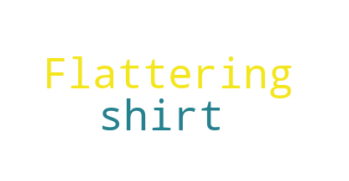

In [13]:
# Start with one review:
text = df.Title[4]

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
# %% [code]
df1 = df[(df['Rating'] <= 2)]
df2 = df[(df['Rating'] == 5)]
df3 = df[(df['Rating'] <= 2) & (df['Class_Name'] == 'Blouses')]

There are 44462 words in the combination of all review.


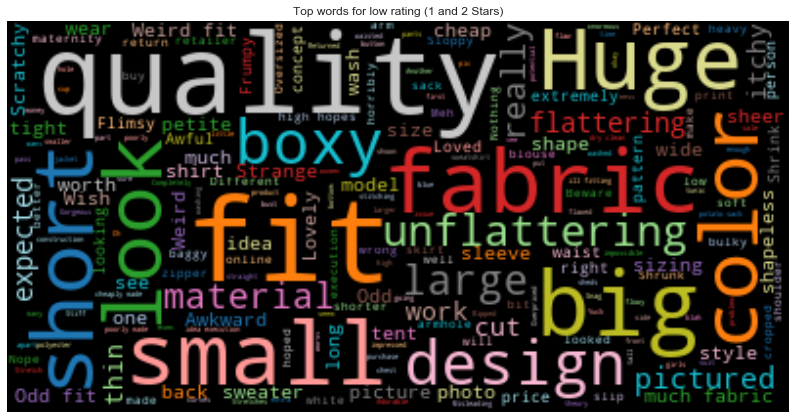

In [16]:
# %% [code]
text = " ".join(review for review in df1.Title.astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

There are 3753646 words in the combination of all review.


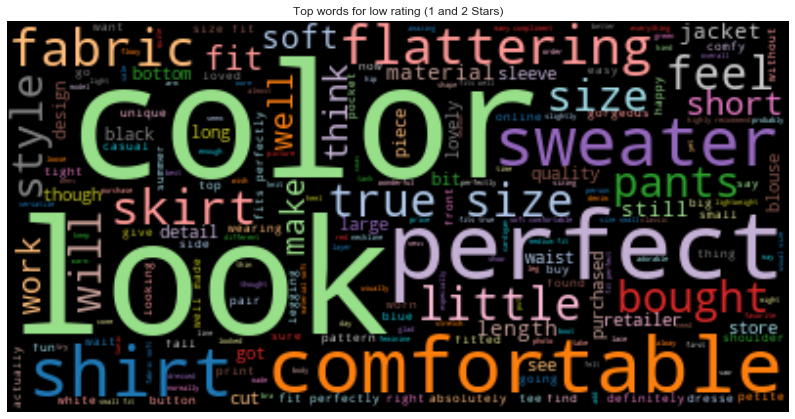

In [17]:
# %% [code]
text = " ".join(review for review in df2['Review_Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant',
                 'really','back','even','much','ordered','wear','one','tried'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

There are 6332 words in the combination of all review.


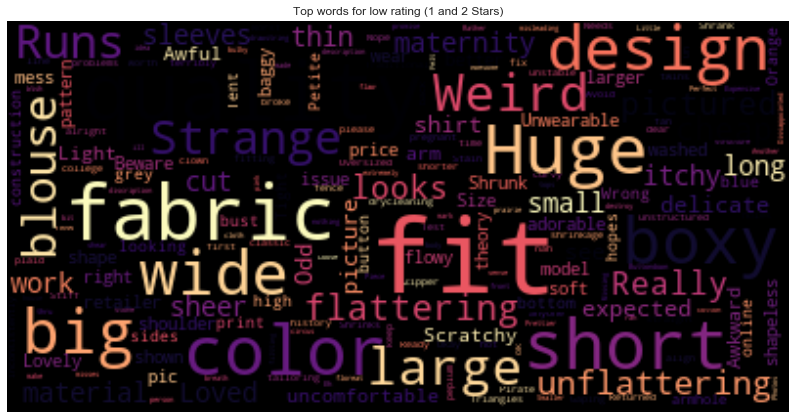

In [18]:
# %% [code]
text = " ".join(review for review in df3['Title'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','nice','great','pretty','horrible',
                  'super','poor','sad','way'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="magma").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()



## Topic modeling by Clothing_ID

##### I'm trying to see what people talk about in each product, i.e. if they like or dislike(rating average), then what they like/dislike about that product. I use topic modeling using LDA model. An expected result of the model would be that, for clothing id 1001, positive reviews talk most about quality, while negative reviews talk most about price, etc.

In [81]:
df['Review_Text'].describe()

count     22613                                                                             
unique    22607                                                                             
top       Perfect fit and i've gotten so many compliments. i buy all my suits from here now!
freq      3                                                                                 
Name: Review_Text, dtype: object

In [20]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

In [21]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
my_words = ['nan','one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
stop_words = stop_words.union(my_words)

In [24]:
df['Review_Text'] = df['Review_Text'].astype(str)

In [25]:
# df1 = df.groupby('Clothing_ID')['Review_Text'].apply(lambda x: "{%s}" % ', '.join(x))
df2 = df.groupby('Clothing_ID')['Review_Text'].apply(lambda x: x.sum()).reset_index()

In [26]:
len(df2)

1206

In [27]:
review_text = df2['Review_Text'].values
corpus = []
for i in range(0, 1177):
    #Remove punctuations
    t = re.sub('[^a-zA-Z]',' ',str(review_text[i]))
    #Convert to lowercase
    t = t.lower()
    #remove tags
    t=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",t)
    # remove special characters and digits
    t=re.sub("(\\d|\\W)+"," ",t)
    ##Convert to list from string
    t = t.split()
    ##Stemming
    # ps=PorterStemmer()
    #Lemmatisation
#     lem = WordNetLemmatizer()
#     t = [lem.lemmatize(word) for word in t if not word in
#     stop_words]
    t = " ".join(t)
    corpus.append(t)

In [28]:
from langdetect import detect

from tqdm import tqdm
tqdm.pandas()

df['lang'] = df['Review_Text'].progress_map(detect)
df = df.loc[df.lang=='en']

100%|██████████| 23465/23465 [02:57<00:00, 131.90it/s]


In [29]:
df['lang'].value_counts()

en    22612
Name: lang, dtype: int64

In [30]:
df = df.loc[df.lang=='en']

#### Tokenization

In [71]:
from nltk.tokenize import sent_tokenize
df['sentences'] = df['Review_Text'].progress_map(sent_tokenize)
df['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

100%|██████████| 22612/22612 [00:05<00:00, 4495.09it/s]


['Absolutely wonderful - silky and sexy and comfortable']

In [31]:
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
tqdm.pandas()

tokenized_sents = [sent_tokenize(i) for i in corpus]

In [32]:
tokenized_sents

[[],
 ['originally bought black white recently purchased several different colorways perfect wear tank cami busty gal sometimes cami strap thin dig shoulder soft smooth provides enough coverage flattering fit well great loose knit low cut sweater love love tank material fit great love reversible highly recommend love tank comfortable flaw roll every time walk anything becomes bothersome'],
 ['adore top comfy stylish wear little purple cardigan feel like iris bloom like reviewer mentioned though strap way long cut sew make wearable slouched front looked sloppy awful tried layering looked absurd'],
 ['love sweater definite classic get lot compliment'],
 ['sweater comfy classic balance quirky hand knit look beautiful color practical fit bit cropped boxy part style others mentioned gap knit make see opinion make perfect layering like longer camisole showing underneath wearing little dress warm still thin enough fit jacket coat'],
 ['currently prowl color fantastic sweater dress tunic laven

In [62]:
type(tokenized_words)

list

In [33]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tokenized_words = [word_tokenize(i) for i in corpus]

[nltk_data] Downloading package punkt to /Users/dangloan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
tokenized_sents[759]

['fabric felt looked cheap hem completely frayed way around perhaps purposely ratty looking']

In [36]:
tokenized_words[759]

['fabric',
 'felt',
 'looked',
 'cheap',
 'hem',
 'completely',
 'frayed',
 'way',
 'around',
 'perhaps',
 'purposely',
 'ratty',
 'looking']

In [34]:
corpus[759]

'fabric felt looked cheap hem completely frayed way around perhaps purposely ratty looking'

In [44]:
subs = 'looking'
res = [i for i in tokenized_words if subs in i]
len(res)

300

In [45]:
res

[['ordered',
  'legging',
  'loved',
  'hour',
  'point',
  'belt',
  'loop',
  'ripped',
  'pant',
  'leaving',
  'hole',
  'called',
  'customer',
  'service',
  'sent',
  'nd',
  'pair',
  'thing',
  'happened',
  'never',
  'even',
  'pulled',
  'belt',
  'loop',
  'flimsy',
  'shame',
  'bc',
  'cool',
  'looking'],
 ['wear',
  'size',
  'dress',
  'run',
  'tt',
  'though',
  'stretch',
  'found',
  'bust',
  'tad',
  'tight',
  'c',
  'light',
  'good',
  'movement',
  'find',
  'short',
  'waisted',
  'thought',
  'proportion',
  'correct',
  'length',
  'long',
  'enough',
  'make',
  'feel',
  'comfortable',
  'wearing',
  'looking',
  'forward',
  'wearing',
  'holiday',
  'dinner',
  'season'],
 ['looking',
  'lace',
  'short',
  'year',
  'yes',
  'year',
  'finally',
  'found',
  'short',
  'perfect',
  'lace',
  'sturdy',
  'flimsy',
  'see',
  'purchased',
  'cream',
  'blue',
  'went',
  'sale',
  'skin',
  'bit',
  'tan',
  'lighter',
  'colored',
  'clothing',
  'see

In [184]:
df2[df2['Clothing_ID'] == 782]

Clothing_ID  \
759  782           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Review_Text  
759  This top is cute, my kind of style, but it is really sheer. i would need to wear a white tank top underneath.Overall the top is cute . what doesn't show in the photo are the pleats on the shoulder/neck area. the placement of the pleats makes you look like you have a football player neck . the neck area doesn't lay flat but comes off as puffy at your neck. i've never seen pleats placed in such a spot. ruined an otherwise cute topI love this top! i've already worn it 3 times since getting it about 2 weeks ago. it is beautiful and has a lovely, subtle pattern to the fabric that i didn't initially see in the photo, but then did and still wanted it. it has a nice drape and is comfortable and flattering. my only critique is that it comes up a little shorter on my torso than i expected. i am a medium/size 8 with 34d bust and the top comes to maybe 2 inches below my belly button. i think it's still flattering and comfortable,

In [185]:
df[df['Clothing_ID'] == 782]

Clothing_ID  Age                                   Title  \
4606  782          37   Cute top                                 
4621  782          60   Shoulders are off, bad pleat placement   
4639  782          23   Beautiful top, shorter than expected     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Review_Text  \
4606  This top is cute, my kind of style, but it is really sheer. i would need to wear a white tank top underneath.                                                                                                                                                                                                                                                                                                                                                                                                         
4621  Overall the top is cute . what doesn't show in the photo are the pleats on the shoulder/neck area. the placement of the pleats makes you look like you have a football player neck . the neck area doesn't lay flat but comes off as puffy at your neck. i've never seen pleats placed in such a spot. ruined an otherwise cute top                                                                                                                                                                                   
4639  I love this top! i've already worn it 3 times since getting it about 2 weeks ago. it is beautiful and has a lovely, subtle pattern to the fabric that i didn't initially see in the photo, but then did and still wanted it. it has a nice drape and is comfortable and flattering. my only critique is that it comes up a little shorter on my torso than i expected. i am a medium/size 8 with 34d bust and the top comes to maybe 2 inches below my belly button. i think it's still flattering and comfortable,   

      Rating  Recommended_IND  Positive_Feedback_Count Division_Name  \
4606  4       1                4                        Initmates      
4621  3       0                2                        Initmates      
4639  4       1                0                        Initmates      

     Department_Name Class_Name lang  \
4606  Intimate        Lounge     en    
4621  Intimate        Lounge     en    
4639  Intimate        Lounge     en    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        sentences  \
4606  [This top is cute, my kind of style, but it is really sheer., i would need to wear a white tank top underneath.]                                                                                                                                                                                                                                                                                                                                                                                                              
4621  [Overall the top is cute ., what doesn't show in the photo are the pleats on the shoulder/neck area., the placement of the pleats makes you look like you have a football player neck ., the neck area doesn't lay fla

In [178]:
tokenized_sents[10]

['love striped top perfect throw black skinny denim jacket long grey cardigan pair well camel super soft run big imo even though reviewer said small like bordeaux took x whereas wear small retailer brand similar photo although much looser']

In [176]:
tokenized_words[3]

['sweater',
 'comfy',
 'classic',
 'balance',
 'quirky',
 'hand',
 'knit',
 'look',
 'beautiful',
 'color',
 'practical',
 'fit',
 'bit',
 'cropped',
 'boxy',
 'part',
 'style',
 'others',
 'mentioned',
 'gap',
 'knit',
 'make',
 'see',
 'opinion',
 'make',
 'perfect',
 'layering',
 'like',
 'longer',
 'camisole',
 'showing',
 'underneath',
 'wearing',
 'little',
 'dress',
 'warm',
 'still',
 'thin',
 'enough',
 'fit',
 'jacket',
 'coat']

In [183]:
b[b['Age'] == 3]

Clothing_ID  Age
759   782         3  
592   614         3  
573   595         3  
1162  1189        3  
783   807         3  
726   749         3  
607   630         3  
603   626         3  
109   119         3  
1163  1190        3  
582   604         3  
584   606         3  
126   136         3  
509   529         3  
585   607         3  
1169  1197        3  
124   134         3  
490   510         3  
491   511         3  
643   666         3  
621   644         3  
42    46          3  
1122  1148        3  
545   567         3  
36    40          3  
540   562         3  
1123  1149        3  
665   688         3  
536   558         3  
670   693         3  
1112  1138        3  
32    35          3  
629   652         3  
622   645         3  
564   586         3  
1106  1132        3  
522   542         3  
515   535         3  
716   739         3  
718   741         3  
389   407         3  
757   780         3  
136   147         3  
215   226         3  
235   248         3  
240   253         3  
442   462         3  
951   976         3  
438   456         3  
268   281         3  
278   292         3  
279   293         3  
137   148         3  
424   442         3  
293   307         3  
300   314         3  
421   439         3  
827   851         3  
419   437         3  
417   435         3  
312   326         3  
313   327         3  
317   331         3  
894   919         3  
404   422         3  
346   363         3  
351   368         3  
359   376         3  
863   888         3  
372   390         3  
374   392         3  
386   404         3  
849   874         3  
225   237         3  
282   296         3  
0     1           3  
141   152         3  
166   177         3  
169   180         3  
975   1000        3  
146   157         3  
460   480         3  
176   187         3

In [49]:
type(tokenized_words)

list

In [64]:
test = corpus[1:100]

In [70]:
test

['originally bought black white recently purchased several different colorways perfect wear tank cami busty gal sometimes cami strap thin dig shoulder soft smooth provides enough coverage flattering fit well great loose knit low cut sweater love love tank material fit great love reversible highly recommend love tank comfortable flaw roll every time walk anything becomes bothersome',
 'adore top comfy stylish wear little purple cardigan feel like iris bloom like reviewer mentioned though strap way long cut sew make wearable slouched front looked sloppy awful tried layering looked absurd',
 'love sweater definite classic get lot compliment',
 'sweater comfy classic balance quirky hand knit look beautiful color practical fit bit cropped boxy part style others mentioned gap knit make see opinion make perfect layering like longer camisole showing underneath wearing little dress warm still thin enough fit jacket coat',
 'currently prowl color fantastic sweater dress tunic lavender size fit p

In [65]:
# typea = ['colors', 'caresses', 'ponies', 'presumably', 'owed', 'says']
lmtzr = WordNetLemmatizer()
lemmatized_words = [lmtzr.lemmatize(word) for word in test]
print (lemmatized_words)

['originally bought black white recently purchased several different colorways perfect wear tank cami busty gal sometimes cami strap thin dig shoulder soft smooth provides enough coverage flattering fit well great loose knit low cut sweater love love tank material fit great love reversible highly recommend love tank comfortable flaw roll every time walk anything becomes bothersome', 'adore top comfy stylish wear little purple cardigan feel like iris bloom like reviewer mentioned though strap way long cut sew make wearable slouched front looked sloppy awful tried layering looked absurd', 'love sweater definite classic get lot compliment', 'sweater comfy classic balance quirky hand knit look beautiful color practical fit bit cropped boxy part style others mentioned gap knit make see opinion make perfect layering like longer camisole showing underneath wearing little dress warm still thin enough fit jacket coat', 'currently prowl color fantastic sweater dress tunic lavender size fit perfe

In [69]:
subs = 'bought'
res = [i for i in lemmatized_words if subs in i]
len(res)

13

In [58]:
typea = [['colors', 'caresses', 'ponies', 'presumably', 'owed', 'says']]
tp = tuple(typea)
lmtzr = WordNetLemmatizer()
lemmatized_words = [lmtzr.lemmatize(x) for x in tp]
print (lemmatized_words)

TypeError: unhashable type: 'list'

In [72]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['tokens_sentences'] = df['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(df['tokens_sentences'].head(1).tolist()[0][:3])

[nltk_data] Downloading package punkt to /Users/dangloan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 22612/22612 [00:18<00:00, 1200.61it/s]

[['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable']]


#### Lemmatizing with POS tagging¶

In [78]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [79]:
df['POS_tokens'] = df['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(df['POS_tokens'].head(1).tolist()[0][:3])


100%|██████████| 22612/22612 [01:57<00:00, 191.92it/s]


[[('Absolutely', 'RB'), ('wonderful', 'JJ'), ('-', ':'), ('silky', 'NN'), ('and', 'CC'), ('sexy', 'NN'), ('and', 'CC'), ('comfortable', 'JJ')]]


In [80]:
print(df['POS_tokens'].head(1).tolist()[0][:3])

[[('Absolutely', 'RB'), ('wonderful', 'JJ'), ('-', ':'), ('silky', 'NN'), ('and', 'CC'), ('sexy', 'NN'), ('and', 'CC'), ('comfortable', 'JJ')]]


In [73]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [75]:
# Lemmatizing each word with its POS tag, in each sentence
df['tokens_sentences_lemmatized'] = df['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

KeyError: 'POS_tokens'

In [129]:
# df['tokens_sentences_tuple'] = [tuple(x) for x in df['tokens_sentences']]


# import itertools

flattened_list  = list(itertools.chain(*list_of_lists))


# df['tokens_sentences_tuple'] = list(itertools.chain.from_iterable(df['tokens_sentences']))
# df['tokens_sentences_tuple'] = df['tokens_sentences'].progress_map(lambda listoflist: [
#     list(itertools.chain.from_iterable(x)) for x in listoflist
# ])

# flatten = lambda l: [item for sublist in l for item in sublist]
# df['tokens_sentences_tuple'] = lambda



# df['tokens_sentences_lemmatized'] = df['tokens_sentences'].progress_map(
#     lambda tokens_sentences: [lemmatizer.lemmatize(tokens) for tokens in tokens_sentences])



# df['sentences'].fillna('', inplace=True)

# df['POSTags']= df['sentences'].apply(lamda row: [pos_tag(word_tokenize(row) for item in row])



# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# def token_text(text):
#     return [w_tokenizer.tokenize(w) for w in text]
# df['tokens_sentences_test'] = df['sentences'].apply(token_text)





import nltk

# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# def get_pos(text):
    

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]
#     return [lemmatizer.lemmatize(w, get_pos(word)) for w in w_tokenizer.tokenize(text)]

# df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
df['text_lemmatized'] = df['tokens_sentences_tuple'].apply(lemmatize_text)

TypeError: unhashable type: 'list'

In [136]:
df['tokens_sentences_tuple'] = df['tokens_sentences'].progress_map(lambda listoflist: [
    list(itertools.chain.from_iterable(x)) for x in listoflist])







  0%|          | 0/22612 [00:00<?, ?it/s]





 17%|█▋        | 3770/22612 [00:00<00:00, 37694.73it/s]





 36%|███▋      | 8248/22612 [00:00<00:00, 39573.07it/s]





 57%|█████▋    | 12955/22612 [00:00<00:00, 41558.72it/s]





 78%|███████▊  | 17726/22612 [00:00<00:00, 43230.00it/s]





100%|██████████| 22612/22612 [00:00<00:00, 43220.23it/s]


In [130]:
#The list of lists
# list_of_lists = [range(4), range(7)]

#flatten the lists
df['flattened_tokens_sentences'] = [y for x in df['tokens_sentences'] for y in x]

ValueError: Length of values does not match length of index

In [128]:
df['tokens_sentences_tuple'] = [tuple(x) for x in df['tokens_sentences']]

In [137]:
df.head()

Clothing_ID  Age                    Title  \
0  767          33   NaN                       
1  1080         34   NaN                       
2  1077         60   Some major design flaws   
3  1049         50   My favorite buy!          
4  847          47   Flattering shirt          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Review_Text  \
0  Absolutely wonderful - silky and sexy and comfortable                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1  Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.                                                                                                                                                                                                        
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3  I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!                                                                                                                                                                                                                                                                                                                                                                                           
4  This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!                                                                                                                                                                                                                                                                                                                       

   Rating  Recommended_IND  Positive_Feedback_Count   Division_Name  \
0  4       1                0                        Initmates        
1  5       1                4                        General          
2  3       0                0                        General          
3  5       1                0                        General Petite   
4  5       1                6                        General          

  Department_Name Class_Name lang  \
0  Intimate        Intimates  en    
1  Dresses         Dresses    en    
2  Dresses         Dresses    en    
3  Bottoms         Pants      en    
4  Tops            Blouses    en    

                     

In [29]:
# %% [code]
from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

NameError: name 'list_of_list_of_tokens' is not defined